In [1]:
import vertmodes
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
H=200
nz = 40
dz=np.zeros(nz)+H/nz
zp1=np.cumsum(np.insert(dz,0,0))

In [3]:
print(zp1)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200.]


In [4]:
z=0.5*(zp1[:-1]+zp1[1:])
print(z)
print(np.shape(z))

[  2.5   7.5  12.5  17.5  22.5  27.5  32.5  37.5  42.5  47.5  52.5  57.5
  62.5  67.5  72.5  77.5  82.5  87.5  92.5  97.5 102.5 107.5 112.5 117.5
 122.5 127.5 132.5 137.5 142.5 147.5 152.5 157.5 162.5 167.5 172.5 177.5
 182.5 187.5 192.5 197.5]
(40,)


In [5]:
alpha = 2e-4*1000
g=9.8
rhoNil=999.8
x = loadmat('density_bk.mat')
rho = x['Sigr'].flatten()
id=np.argwhere(~np.isnan(rho))
rho=rho[id].flatten()
rho_s=np.sort(rho)

In [12]:
p = (x['grid_p'][id]*100).flatten()
TT= 35-(rho_s-1022)/alpha
fT =  interp1d(p,TT,fill_value='extrapolate')
T0 = fT(z)
N1 = 9e-3
T1 = T0.copy()
print(T0)

[85.92201725 50.6893352  36.46354156 31.74820683 31.12493043 28.81501653
 28.48325403 27.99012809 27.52662215 26.91937388 25.94809506 25.84471572
 25.60864375 25.10060074 24.45152388 24.3347042  24.23744091 24.15855878
 24.13254726 24.06181148 24.00510399 23.96052891 23.94406631 23.92501109
 23.92105701 23.91643018 23.87768919 23.8679049  23.86387911 23.85932652
 23.85474268 23.8474674  23.8353964  23.81899132 23.80258624 23.78618117
 23.76977609 23.75337101 23.73696593 23.72056085]


In [13]:
T1[0:5] = 31.7+np.cumsum(N1**2/g/alpha*1000*(-dz[0:5]))
print(T1)

[31.49336735 31.28673469 31.08010204 30.87346939 30.66683673 28.81501653
 28.48325403 27.99012809 27.52662215 26.91937388 25.94809506 25.84471572
 25.60864375 25.10060074 24.45152388 24.3347042  24.23744091 24.15855878
 24.13254726 24.06181148 24.00510399 23.96052891 23.94406631 23.92501109
 23.92105701 23.91643018 23.87768919 23.8679049  23.86387911 23.85932652
 23.85474268 23.8474674  23.8353964  23.81899132 23.80258624 23.78618117
 23.76977609 23.75337101 23.73696593 23.72056085]


In [14]:
print(T0)

[85.92201725 50.6893352  36.46354156 31.74820683 31.12493043 28.81501653
 28.48325403 27.99012809 27.52662215 26.91937388 25.94809506 25.84471572
 25.60864375 25.10060074 24.45152388 24.3347042  24.23744091 24.15855878
 24.13254726 24.06181148 24.00510399 23.96052891 23.94406631 23.92501109
 23.92105701 23.91643018 23.87768919 23.8679049  23.86387911 23.85932652
 23.85474268 23.8474674  23.8353964  23.81899132 23.80258624 23.78618117
 23.76977609 23.75337101 23.73696593 23.72056085]


(20.0, 40.0)

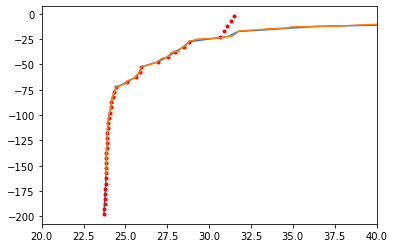

In [15]:
fig,axs=plt.subplots()
axs.plot(T0,-z)
axs.plot(T1,-z,".r")
axs.plot(TT,-p)
axs.set_xlim(20,40)

In [16]:
refTemp=T1[0]
rho2=rhoNil*(1-(alpha/1000*(T1-refTemp)))
print(rho2)

[ 999.8         999.84131827  999.88263653  999.9239548   999.96527306
 1000.33556303 1000.40190226 1000.50050772 1000.59319037 1000.71461573
 1000.90883265 1000.92950438 1000.97670933 1001.07829761 1001.20808702
 1001.23144628 1001.25089505 1001.26666832 1001.27186958 1001.28601391
 1001.29735314 1001.30626637 1001.30955823 1001.31336852 1001.31415917
 1001.31508436 1001.322831   1001.32478747 1001.32559247 1001.3265028
 1001.32741939 1001.32887415 1001.33128787 1001.33456823 1001.33784859
 1001.34112895 1001.34440931 1001.34768967 1001.35097003 1001.35425039]


In [17]:
np.diff(rho2)

array([0.04131827, 0.04131827, 0.04131827, 0.04131827, 0.37028997,
       0.06633923, 0.09860546, 0.09268265, 0.12142536, 0.19421691,
       0.02067173, 0.04720495, 0.10158828, 0.12978941, 0.02335926,
       0.01944877, 0.01577327, 0.00520126, 0.01414433, 0.01133923,
       0.00891323, 0.00329186, 0.00381028, 0.00079066, 0.00092518,
       0.00774665, 0.00195647, 0.000805  , 0.00091034, 0.00091658,
       0.00145476, 0.00241372, 0.00328036, 0.00328036, 0.00328036,
       0.00328036, 0.00328036, 0.00328036, 0.00328036])

In [18]:
s = InterpolatedUnivariateSpline(z, rho2, k=1)

In [19]:
rhol=s(zp1)
print(rhol)

[ 999.77934087  999.82065913  999.8619774   999.90329566  999.94461393
 1000.15041805 1000.36873264 1000.45120499 1000.54684905 1000.65390305
 1000.81172419 1000.91916851 1000.95310685 1001.02750347 1001.14319231
 1001.21976665 1001.24117067 1001.25878169 1001.26926895 1001.27894175
 1001.29168353 1001.30180976 1001.3079123  1001.31146338 1001.31376385
 1001.31462177 1001.31895768 1001.32380924 1001.32518997 1001.32604764
 1001.3269611  1001.32814677 1001.33008101 1001.33292805 1001.33620841
 1001.33948877 1001.34276913 1001.34604949 1001.34932985 1001.35261021
 1001.35589057]


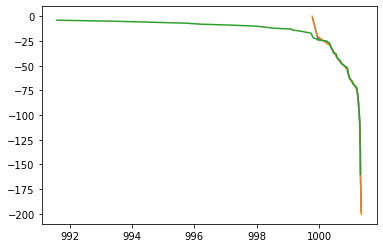

In [22]:
fig,axs=plt.subplots()
axs.plot(rho2,-z)
axs.plot(rhol,-zp1)
axs.plot(rho-22.9,-p)

In [23]:
Ns0=g/rhoNil*np.diff(rhol)/dz
print(Ns0)
print(np.shape(Ns0))

[8.10000000e-05 8.10000000e-05 8.10000000e-05 8.10000000e-05
 4.03456761e-04 4.27982210e-04 1.61678133e-04 1.87499848e-04
 2.09867824e-04 3.09391310e-04 2.10633001e-04 6.65324563e-05
 1.45846535e-04 2.26795495e-04 1.50115723e-04 4.19602629e-05
 3.45245030e-05 2.05591541e-05 1.89624692e-05 2.49788827e-05
 1.98513844e-05 1.19633836e-05 6.96149270e-06 4.50982323e-06
 1.68185900e-06 8.50009242e-06 9.51095497e-06 2.70677632e-06
 1.68136226e-06 1.79074001e-06 2.32438656e-06 3.79187063e-06
 5.58131169e-06 6.43079094e-06 6.43079094e-06 6.43079094e-06
 6.43079094e-06 6.43079094e-06 6.43079094e-06 6.43079094e-06]
(40,)


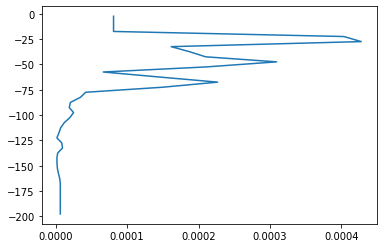

In [24]:
fig,axs=plt.subplots()
axs.plot(Ns0,-z)

In [16]:
print(dz)

[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


In [25]:
psi,phi,ce,zph = vertmodes.vertModes(Ns0,dz[0])
print(np.shape(psi))
for i in range(4):
    print('int psi 0 psi %d:  %1.2e'%(i,np.sum(psi[:,0]*psi[:,i]*dz)))

(40, 37)
int psi 0 psi 0:  1.00e+00
int psi 0 psi 1:  -3.37e-13
int psi 0 psi 2:  -1.83e-13
int psi 0 psi 3:  -6.48e-14


In [26]:
print(zph)
print(np.shape(zph))

[  2.5   7.5  12.5  17.5  22.5  27.5  32.5  37.5  42.5  47.5  52.5  57.5
  62.5  67.5  72.5  77.5  82.5  87.5  92.5  97.5 102.5 107.5 112.5 117.5
 122.5 127.5 132.5 137.5 142.5 147.5 152.5 157.5 162.5 167.5 172.5 177.5
 182.5 187.5 192.5 197.5]
(40,)


Text(0.5, 0, '$\\psi$: vertical structure')

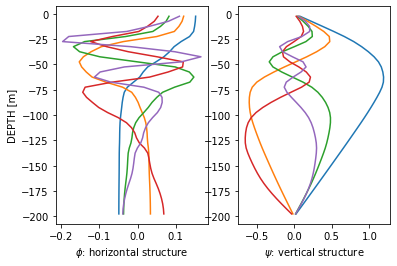

In [27]:
fig,axs=plt.subplots(1,2)
for nn in range(5):
    axs[0].plot(psi[:,nn],-zph)
    axs[1].plot(phi[:,nn],-zph)
axs[0].set_ylabel('DEPTH [m]')
axs[0].set_xlabel('$\phi$: horizontal structure')
axs[1].set_xlabel('$\psi$: vertical structure')

In [20]:
print(psi[:,3])

[ 0.07284268  0.05706263  0.02892099 -0.01558662 -0.1273221  -0.14592932
 -0.05024726  0.0179295   0.08779818  0.12971763  0.09863288  0.05245414
  0.00500295 -0.08027467 -0.13375673 -0.13318352 -0.12192165 -0.10653657
 -0.09093739 -0.06926552 -0.04379183 -0.02420478 -0.01205734 -0.00454436
 -0.00045872  0.00626499  0.01803646  0.02578291  0.02844259  0.03044009
  0.03267183  0.0357724   0.04016084  0.04526226  0.0500939   0.05422766
  0.05760598  0.06018178  0.06191918  0.06279397]


In [29]:
print(psi[:,4])

[ 0.11212353  0.08014032  0.0252971  -0.05498073 -0.22197375 -0.13055262
  0.05351662  0.12146053  0.12994414  0.04479437 -0.07370415 -0.10772638
 -0.10116515 -0.03588546  0.04943302  0.0793697   0.08263235  0.07849024
  0.07109403  0.05841514  0.04174475  0.02802005  0.01909966  0.01338008
  0.01017476  0.00475599 -0.00495155 -0.01145034 -0.01371279 -0.01543504
 -0.01738566 -0.02013318 -0.0240746  -0.02871324 -0.03315321 -0.03698503
 -0.04013839 -0.04255547 -0.04419191 -0.04501771]


In [22]:
refTemp=T0[0]
rho3=rhoNil*(1-(alpha/1000*(T0-refTemp)))
print(rho3)

[ 999.8        1006.8451271  1009.6897168  1010.63259513 1010.75722548
 1011.21911587 1011.28545509 1011.38406056 1011.4767432  1011.59816857
 1011.79238548 1011.81305722 1011.86026216 1011.96185045 1012.09163985
 1012.11499912 1012.13444789 1012.15022116 1012.15542242 1012.16956675
 1012.18090598 1012.18981921 1012.19311107 1012.19692135 1012.19771201
 1012.19863719 1012.20638384 1012.20834031 1012.2091453  1012.21005564
 1012.21097222 1012.21242699 1012.21484071 1012.21812106 1012.22140142
 1012.22468178 1012.22796214 1012.2312425  1012.23452286 1012.23780322]


In [23]:
s = InterpolatedUnivariateSpline(z, rho3, k=1)

In [24]:
rhol3=s(zp1)
print(rhol3)

[ 996.27743645 1003.32256355 1008.26742195 1010.16115597 1010.69491031
 1010.98817067 1011.25228548 1011.33475783 1011.43040188 1011.53745589
 1011.69527702 1011.80272135 1011.83665969 1011.9110563  1012.02674515
 1012.10331949 1012.1247235  1012.14233452 1012.15282179 1012.16249458
 1012.17523636 1012.18536259 1012.19146514 1012.19501621 1012.19731668
 1012.1981746  1012.20251052 1012.20736207 1012.2087428  1012.20960047
 1012.21051393 1012.21169961 1012.21363385 1012.21648089 1012.21976124
 1012.2230416  1012.22632196 1012.22960232 1012.23288268 1012.23616304
 1012.2394434 ]


In [25]:
Ns0_3=g/rhoNil*np.diff(rhol3)/dz
print(Ns0_3)
print(np.shape(Ns0_3))

[1.38112114e-02 9.69386124e-03 3.71246116e-03 1.04636778e-03
 5.74905300e-04 5.17768575e-04 1.61678133e-04 1.87499848e-04
 2.09867824e-04 3.09391310e-04 2.10633001e-04 6.65324563e-05
 1.45846535e-04 2.26795495e-04 1.50115723e-04 4.19602629e-05
 3.45245030e-05 2.05591541e-05 1.89624692e-05 2.49788827e-05
 1.98513844e-05 1.19633836e-05 6.96149270e-06 4.50982323e-06
 1.68185900e-06 8.50009242e-06 9.51095497e-06 2.70677632e-06
 1.68136226e-06 1.79074001e-06 2.32438656e-06 3.79187063e-06
 5.58131169e-06 6.43079094e-06 6.43079094e-06 6.43079094e-06
 6.43079094e-06 6.43079094e-06 6.43079094e-06 6.43079094e-06]
(40,)


In [26]:
psi3,phi3,ce3,zph3 = vertmodes.vertModes(Ns0_3,dz[0])
print(np.shape(psi))
for i in range(4):
    print('int psi 0 psi %d:  %1.2e'%(i,np.sum(psi3[:,0]*psi3[:,i]*dz)))

(40, 37)
int psi 0 psi 0:  1.00e+00
int psi 0 psi 1:  -1.57e-12
int psi 0 psi 2:  -8.14e-13
int psi 0 psi 3:  7.56e-13


Text(0.5, 0, '$\\psi$: vertical structure')

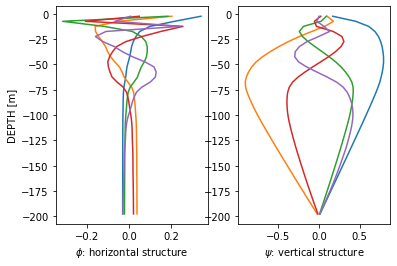

In [27]:
fig,axs=plt.subplots(1,2)
for nn in range(5):
    axs[0].plot(psi3[:,nn],-zph3)
    axs[1].plot(phi3[:,nn],-zph3)
axs[0].set_ylabel('DEPTH [m]')
axs[0].set_xlabel('$\phi$: horizontal structure')
axs[1].set_xlabel('$\psi$: vertical structure')

In [28]:
print(psi3[:,3])

[ 0.04929162 -0.20583479  0.25629555  0.1517648   0.06197137 -0.01345669
 -0.05834606 -0.07692918 -0.09134556 -0.09973951 -0.09672463 -0.08921442
 -0.07928747 -0.05536352 -0.0265705  -0.01077361 -0.00430183  0.00041127
  0.00378926  0.00750835  0.01122856  0.01379002  0.01525622  0.01610643
  0.01654337  0.01722481  0.0183619   0.01908385  0.0193247   0.0195005
  0.01969119  0.01994808  0.02030061  0.02069868  0.02106628  0.02137422
  0.02162163  0.0218078   0.0219322   0.02199449]
